In [8]:
import pandas as pd
import geopandas

from litecoder.models import WOFLocality
from shapely.geometry import Point

In [77]:
import matplotlib.pyplot as plt

In [93]:
states = geopandas.read_file('../data/cb_2017_us_state_5m/cb_2017_us_state_5m.shp')
states = states.to_crs(epsg=3395)

In [94]:
rows = []
for loc in WOFLocality.clean_us_cities():
    
    point = Point(loc.longitude, loc.latitude)
    
    rows.append((
        loc.wof_id,
        loc.name,
        loc.us_state_abbr,
        loc.population,
        point,
    ))
    
wof_cities = pd.DataFrame(rows, columns=(
    'wof_id',
    'name',
    'state',
    'population',
    'point',
))

wof_cities.set_index('wof_id', inplace=True)

wof_cities = geopandas.GeoDataFrame(
    wof_cities,
    crs={'init': 'epsg:4326', 'no_defs': True},
    geometry='point',
)

wof_cities = wof_cities.to_crs(epsg=3395)

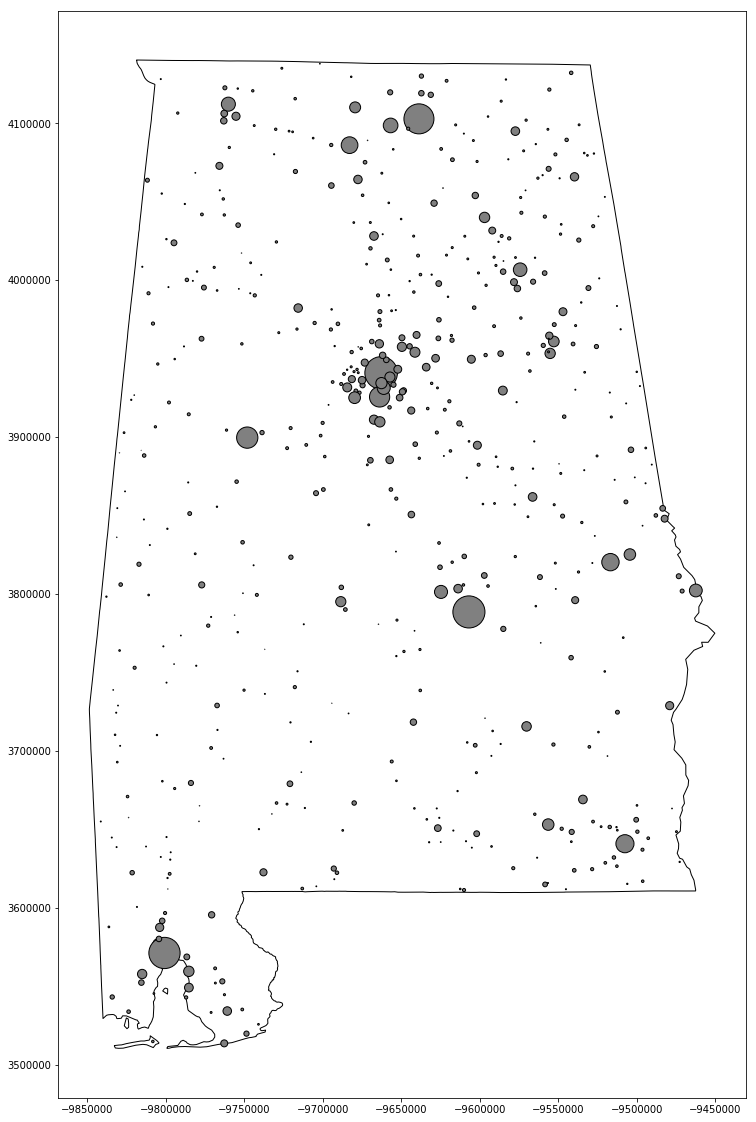

In [96]:
ax = states[states.STUSPS=='AL'].plot(color='white', edgecolor='black', figsize=(20,20))
df = wof_cities[wof_cities.state=='AL']

df.plot(ax=ax, markersize=df.population / 200, color='gray', edgecolor='black')

In [101]:
al_cities = wof_cities[wof_cities.state=='AL']
al_cities_10k = al_cities[(al_cities.population>8000) & (al_cities.population<12000)]
al_cities_other = al_cities[~al_cities.index.isin(al_cities_10k.index)]

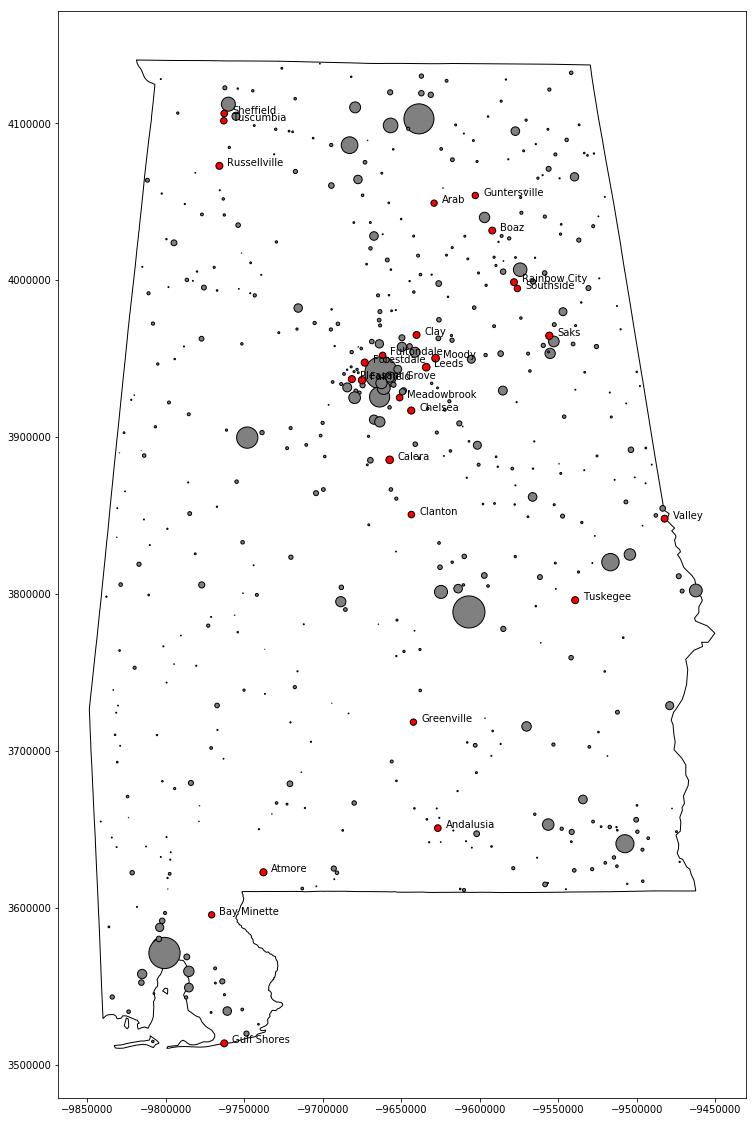

In [102]:
ax = states[states.STUSPS=='AL'].plot(color='white', edgecolor='black', figsize=(20,20))

al_cities_other.plot(ax=ax, markersize=al_cities_other.population / 200, color='gray', edgecolor='black')
al_cities_10k.plot(ax=ax, markersize=al_cities_10k.population / 200, color='red', edgecolor='black')

for r in al_cities_10k.itertuples():
    plt.annotate(r.name, xy=(r.point.x, r.point.y), xytext=(r.point.x + 5000, r.point.y))

In [105]:
tracts = pd.read_table('../data/Gaz_tracts_national.txt', encoding='ISO-8859-1')

tracts['point'] = tracts.apply(lambda r: Point(r.INTPTLONG, r.INTPTLAT), axis=1)

tracts = geopandas.GeoDataFrame(
    tracts,
    crs={'init': 'epsg:4326', 'no_defs': True},
    geometry='point',
)

tracts = tracts.to_crs(epsg=3395)

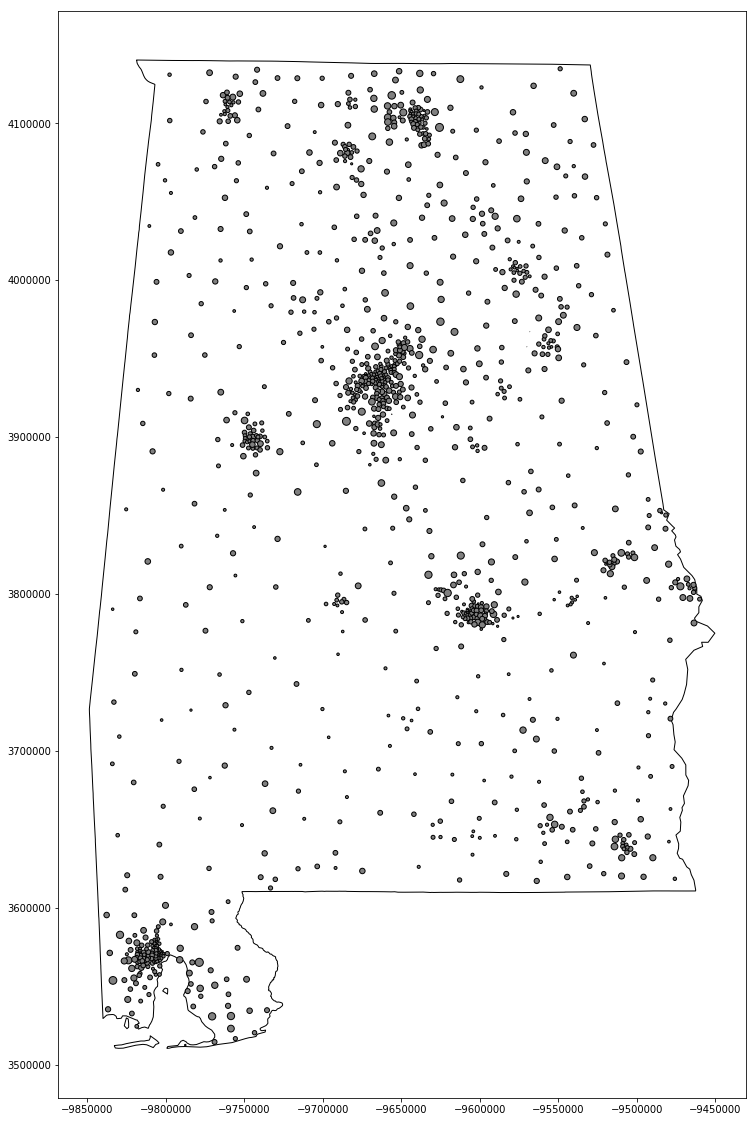

In [107]:
ax = states[states.STUSPS=='AL'].plot(color='white', edgecolor='black', figsize=(20,20))
df = tracts[tracts.USPS=='AL']

df.plot(ax=ax, markersize=df.POP10 / 200, color='gray', edgecolor='black')